<a href="https://colab.research.google.com/github/PrasadReddyGaddam/PYTHON/blob/master/30_06_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Problem Statement**

The problem that we are going to solve here is that given a set of features that describe a tumour whether it is Malignant or Benign, our machine learning model must predict whether the tumour is Malignant or Benign. To train our machine learning model with tumour data, we will be using [SCLCData](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read the data
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv")
data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,0.2023,0.6850,1.236,16.89,0.005969,0.014930,0.01564,0.008463,0.01093,0.001672,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,0.3380,2.5090,2.394,19.33,0.017360,0.046710,0.02611,0.012960,0.03675,0.006758,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,0.2054,0.4956,1.344,19.53,0.003290,0.013950,0.01774,0.006009,0.01172,0.002575,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,0.3060,0.7213,2.143,25.70,0.006133,0.012510,0.01615,0.011360,0.02207,0.003563,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [3]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [5]:
# Preaparing i/o and droping id and diagnosis columns for input
X = data.drop(["id","diagnosis"],axis=1) 
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [6]:
#Accessing output
y = data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [7]:
#Preaparing training and testing data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=4)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scalaling training data
scaled_X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.932609,1.148851,0.975452,0.833126,0.780328,1.554125,1.088358,0.851863,0.427097,0.370951,0.691479,-0.307448,0.439866,0.631991,-0.400990,1.855625,0.580055,-0.002172,-0.620909,1.350451,1.526707,1.249841,1.378650,1.459096,1.157991,3.054519,1.885629,1.185810,0.621332,2.886912
1,0.071943,0.708110,0.107607,-0.040975,0.551277,0.257880,0.792786,0.380525,0.423592,-0.408686,-0.689734,1.149039,-0.449888,-0.435124,-0.293112,0.066797,0.758896,0.270777,-0.710033,0.079980,-0.179845,1.320158,-0.064708,-0.245216,0.269476,0.129869,0.756676,0.372133,-0.325308,0.009750
2,-0.286424,-0.016763,-0.366458,-0.340316,-1.059022,-1.228391,-1.086583,-1.113736,0.048520,-1.151271,0.026859,0.003629,-0.105784,-0.132988,0.214242,-0.949821,-1.323399,-1.303349,0.156580,-0.302710,-0.405118,-0.558082,-0.493748,-0.431623,-1.286508,-1.196545,-1.284131,-1.523264,-0.723975,-1.167608
3,-0.318735,-0.719263,-0.342245,-0.397500,0.203535,-0.260618,-0.670098,-0.598449,-0.245929,-0.072130,-0.892289,-0.551994,-0.891079,-0.585563,-1.480867,-0.698748,-0.620866,-0.727959,-0.218678,-0.811298,-0.483751,-0.437762,-0.510531,-0.508904,-0.632041,-0.356422,-0.416816,-0.420634,0.596704,-0.285446
4,1.393785,0.457537,1.345019,1.307521,-0.326059,0.733426,0.272632,0.367729,0.518236,-0.252758,0.874810,0.571839,0.766274,1.025480,0.235228,0.841779,0.426242,1.259986,0.130781,0.424202,1.785984,1.335784,1.668542,1.802570,0.780914,1.443797,0.950321,1.411579,1.184699,0.877066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.145427,-1.889351,-0.141319,-0.246954,2.307336,0.052705,-0.207897,0.489416,2.095640,0.608702,0.048574,-0.355997,-0.077764,-0.139483,2.389828,0.217783,-0.826102,-0.557412,0.604546,1.283006,-0.436997,-2.083176,-0.459571,-0.464897,0.577206,-0.719728,-0.879678,-0.569277,-0.306837,-0.652586
394,1.896085,0.464249,1.752816,1.931878,-0.854265,-0.354193,0.071541,0.349973,-1.185360,-1.651473,1.035714,-0.307448,1.147246,0.925955,0.386551,0.391181,0.582330,0.994365,-0.839028,0.168409,1.717977,0.054455,1.686851,1.582532,-0.389325,-0.134924,0.235769,0.497897,-1.033364,-0.689128
395,-0.668289,0.177879,-0.642996,-0.653662,0.905265,0.232952,-0.212285,-0.246447,0.658449,0.318461,0.375010,0.864935,0.548505,-0.020263,0.929251,-0.038185,0.541374,0.043625,1.572010,0.731952,-0.598513,0.060706,-0.534333,-0.575095,0.174123,-0.397835,-0.346136,-0.493213,0.398140,-0.198087
396,-0.174801,0.054830,-0.229251,-0.228866,-0.373257,-0.749202,-0.339420,-0.324786,-0.726161,-0.888819,0.260739,-0.116846,0.163108,0.085757,-0.333612,-0.829681,-0.376040,-0.336855,-0.629118,-0.863256,0.391839,0.632616,0.310626,0.229386,0.360495,-0.614941,-0.013065,0.066057,-0.039007,-0.549809


In [10]:
#scalaling testing data
scaled_X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.621242,-1.012344,0.554910,0.455594,-0.062997,-0.324855,-0.385627,-0.040155,-0.245929,-0.573876,-0.561581,-1.033533,-0.531490,-0.366190,-1.086544,-0.721750,-0.521662,-0.464353,-0.652572,-0.986656,0.334458,-0.975295,0.289266,0.147632,-0.484678,-0.504505,-0.174759,0.019085,-0.202168,-0.754791
1,0.133629,0.464249,0.127997,0.012708,-0.098396,-0.047581,0.458494,0.066908,0.945887,-0.942853,0.085240,1.812550,0.241269,-0.009158,0.905687,0.302713,1.089275,1.159233,0.423952,-0.173314,0.015675,0.535735,0.060404,-0.101029,-0.051256,-0.345127,0.328235,0.164547,0.170331,-0.849573
2,1.517157,-0.770720,1.489447,1.497162,-0.618967,0.317323,0.444296,1.301789,-0.224897,-1.653017,2.148516,-1.040007,2.045358,1.676057,0.919310,0.345177,0.621921,3.051554,1.289393,-0.116860,1.252554,-1.251875,1.226075,1.126355,-0.840084,-0.320028,-0.197029,1.000952,-0.717818,-1.189306
3,0.421496,0.021271,0.444465,0.306506,0.926088,0.390189,0.796658,0.889205,0.441118,-0.695839,0.277115,-0.766151,0.139513,0.188634,-0.246353,-0.581380,-0.074786,-0.064456,-0.773358,-0.566995,0.663868,0.027891,0.563900,0.519909,0.988956,-0.082844,0.542213,0.602448,-0.111352,-0.179815
4,-1.105966,-1.602982,-1.082653,-0.940166,0.284744,-0.508745,-0.847312,-0.708646,-0.018082,0.497546,-0.731028,-1.194466,-0.718781,-0.574668,-0.451799,-0.651565,-0.968264,-0.797387,-0.138936,-0.611959,-1.010806,-1.589396,-1.012808,-0.842361,0.109110,-0.549683,-0.875999,-0.677010,0.042573,-0.349396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.201189,0.493333,0.183220,0.038091,1.238430,0.662477,0.573366,0.898605,0.777631,0.789330,0.093072,-0.111451,-0.036964,0.016404,-1.196630,0.227220,-0.184457,0.263449,-0.280831,0.255838,0.368462,0.762311,0.283163,0.214896,0.217466,1.106844,0.443454,1.087320,1.213944,1.488014
167,-0.768162,-1.916198,-0.760237,-0.701802,-0.147676,-0.673077,-0.642219,-0.537606,-0.484292,-0.206443,-0.910088,-1.350904,-0.839218,-0.603583,-0.319990,-0.554840,-0.665918,-0.883301,-0.835510,-0.694392,-0.704774,-1.539393,-0.692096,-0.634845,0.997625,-0.085354,-0.275455,-0.334266,0.164174,0.107958
168,-0.850410,-0.618586,-0.882152,-0.766572,-0.995860,-1.219762,-0.918817,-0.864801,-1.031125,-0.152409,-0.907596,-0.440330,-0.905581,-0.620261,-0.377794,-1.087242,-0.927217,-0.932945,-0.055675,-0.608962,-0.947049,-0.864351,-0.978631,-0.794775,-1.247500,-1.194788,-1.071338,-1.078848,-0.810173,-0.714251
169,-1.254306,1.972164,-1.255542,-1.029735,-1.111774,-1.067895,-0.896617,-0.950190,-0.645538,-0.455001,-0.777306,0.854146,-0.770397,-0.587240,-0.118226,-0.707595,-0.695042,-0.948516,-0.565793,-0.663417,-1.161697,1.734246,-1.171486,-0.922147,-0.900763,-0.889146,-0.944985,-0.954297,-0.905607,-0.641166


In [11]:
# model building
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6,metric="euclidean")

#applying knn object on dataset
#syntax: obj.fit(i,o)
knn.fit(scaled_X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [12]:
#Predictins on data
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array(['M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B

In [13]:
# check accuracy classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98       256
           M       1.00      0.92      0.96       142

    accuracy                           0.97       398
   macro avg       0.98      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398



In [14]:
# checking for optimum k value
# build the modes with multiple k vales
from sklearn.metrics import accuracy_score
scores = []
for k in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, pred_test))
scores


[0.935672514619883,
 0.935672514619883,
 0.9532163742690059,
 0.9532163742690059,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9532163742690059,
 0.9415204678362573,
 0.9473684210526315,
 0.9473684210526315,
 0.9415204678362573,
 0.9532163742690059,
 0.9590643274853801,
 0.9473684210526315,
 0.9473684210526315,
 0.9415204678362573,
 0.9415204678362573]

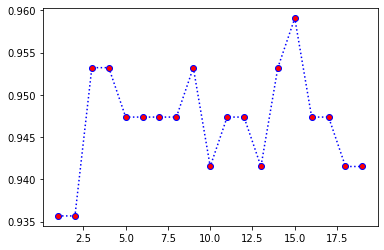

In [15]:
# visualizing scores and k values
plt.plot(range(1,20),scores,marker="o",markerfacecolor="r",color="b",linestyle="dotted")

In [16]:
#optimum value of k  = 7
final_model  = KNeighborsClassifier(n_neighbors=7,metric="euclidean")
final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [17]:
#prediction on traing data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array(['M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B

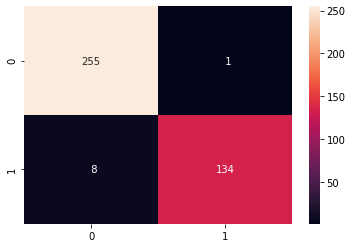

In [18]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot=True,fmt="3.0f") #fmt="d"

In [19]:
# Classificataion report
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       256
           M       0.99      0.94      0.97       142

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.98       398
weighted avg       0.98      0.98      0.98       398



In [20]:
# Prediction on test data
final_test_pred = final_model.predict(scaled_X_test)
final_test_pred

array(['B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M'], dtype=object)

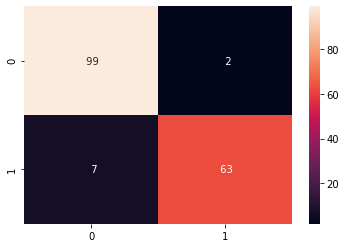

In [21]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,final_test_pred),annot=True,fmt="3.0f") #fmt="d"

In [22]:
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           B       0.93      0.98      0.96       101
           M       0.97      0.90      0.93        70

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

